<a href="https://colab.research.google.com/github/LaisST/FIAP_202501_HandsOn_data_analytics/blob/main/Dengue_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands On - Dengue no Brasil

In [ ]:
# Importar as Bibliotecas (Libs)

# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_dengue = pd.read_excel('/content/Base de Dados Dengue.xlsx')

In [ ]:
# Apresentar as 10 primeiras linhas
df_dengue.head(10)

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3
5,ALTA FLORESTA D'OESTE,RO,2013-06-01,0
6,ALTA FLORESTA D'OESTE,RO,2013-07-01,0
7,ALTA FLORESTA D'OESTE,RO,2013-08-01,3
8,ALTA FLORESTA D'OESTE,RO,2013-09-01,0
9,ALTA FLORESTA D'OESTE,RO,2013-10-01,0


In [ ]:
# Apresentar as 10 últimas linhas
df_dengue.tail(10)

,municipio,uf,data_infeccoes,qtd_infeccoes
728762,BRASILIA,DF,2023-03-01,2738
728763,BRASILIA,DF,2023-04-01,2524
728764,BRASILIA,DF,2023-05-01,2276
728765,BRASILIA,DF,2023-06-01,1522
728766,BRASILIA,DF,2023-07-01,902
728767,BRASILIA,DF,2023-08-01,939
728768,BRASILIA,DF,2023-09-01,843
728769,BRASILIA,DF,2023-10-01,686
728770,BRASILIA,DF,2023-11-01,1300
728771,BRASILIA,DF,2023-12-01,5603


## Explorando o dataset


In [ ]:
#Consultar o formato do dataframe
#(Linhas, colunas)
df_dengue.shape

(728772, 4)

In [ ]:
print(f'Tamanho do nosso Dataset: {df_dengue.shape}')

Tamanho do nosso Dataset: (728772, 4)


In [ ]:
# Caracteristicas das colunas
df_dengue.dtypes

,0
municipio,object
uf,object
data_infeccoes,datetime64[ns]
qtd_infeccoes,int64


## Existe Valores Nulos?

In [ ]:
df_dengue.isnull().sum()

,0
municipio,0
uf,0
data_infeccoes,0
qtd_infeccoes,0


In [ ]:
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


## Informações Sobre a Base

In [ ]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


## Existem Valores Únicos?

In [ ]:
df_dengue.nunique()

,0
municipio,5243
uf,27
data_infeccoes,132
qtd_infeccoes,1157


In [ ]:
# Criar uma coluna de ano
df_dengue['ano'] = df_dengue['data_infeccoes'].dt.year

In [ ]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


## Agrupando dados por Ano, Múnicipio e UF

In [ ]:
infeccoes_municipio = df_dengue.groupby(['ano', 'municipio', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [ ]:
infeccoes_municipio.head()

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [ ]:
infeccoes_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


## Agrupar por Estado e Ano

In [ ]:
infeccoes_estado = df_dengue.groupby(['ano', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [ ]:
infeccoes_estado.head()

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417


#### Ordenar os dados

In [ ]:
infeccoes_estado = infeccoes_estado.sort_values(
    by=['ano', 'qtd_infeccoes'],
    ascending=[False, False]
)

In [ ]:
infeccoes_estado

,ano,uf,qtd_infeccoes
295,2023,SP,198774
280,2023,MG,106923
293,2023,SC,77954
287,2023,PR,48328
288,2023,RJ,27905
...,...,...,...
9,2013,MA,516
22,2013,RS,441
21,2013,RR,398
23,2013,SC,278


## Estatística Descritiva

A função describe(), traz:

**count**	Quantas linhas

**mean**	Média

**std**	Desvio padrão

**min**	Valor mínimo

**25%**	Primeiro quartil (25% dos dados estão abaixo desse valor)

**50%**	Mediana (50% dos dados estão abaixo desse valor)

**75%**	Terceiro quartil (75% dos dados estão abaixo desse valor)

**max**	Valor máximo

In [ ]:
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


In [ ]:
infeccoes_estado.shape

(297, 3)

### Interpretação da estatística descritiva utilizando gráfico Boxplot
As Bibliotecas já foram importadas

/tmp/ipython-input-54-2845617756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', palette='viridis')


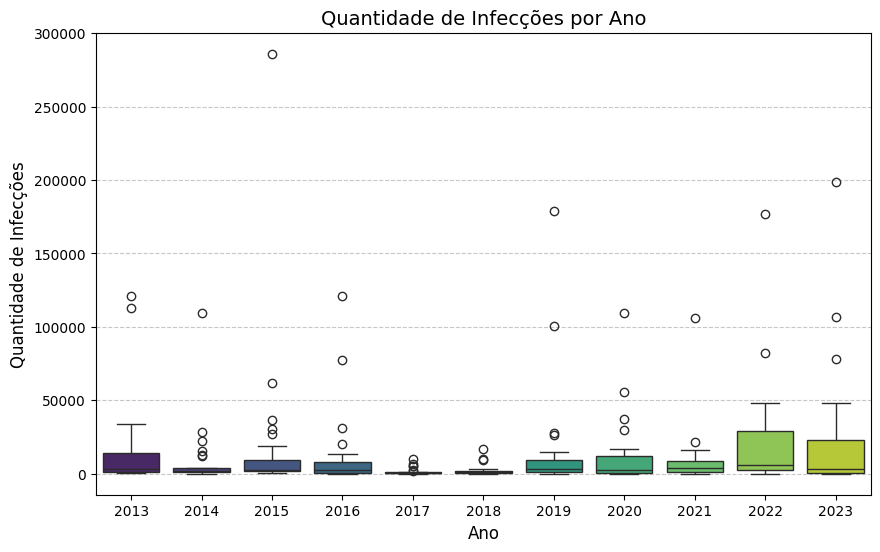

In [ ]:
# Criar boxplot comparando a quantidade de infecções por ano
plt.figure(figsize = (10,6))
sns.boxplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', palette='viridis')

# Personalizar o gráfico
plt.title('Quantidade de Infecções por Ano', fontsize = 14)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Mostrar o gráfico
plt.show()

### Foco no ano de 2023

In [ ]:
# Filtrar e ordenar os dados por ano (2023)
infeccoes_estado_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]
infeccoes_estado_2023.sort_values(by = 'qtd_infeccoes', ascending= False)

,ano,uf,qtd_infeccoes
295,2023,SP,198774
280,2023,MG,106923
293,2023,SC,77954
287,2023,PR,48328
288,2023,RJ,27905
292,2023,RS,27389
276,2023,DF,23710
278,2023,GO,21682
281,2023,MS,21098
282,2023,MT,19356


In [ ]:
infeccoes_estado_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


/tmp/ipython-input-58-1587683673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_estado_2023, x = 'uf', y = 'qtd_infeccoes', palette='pastel')


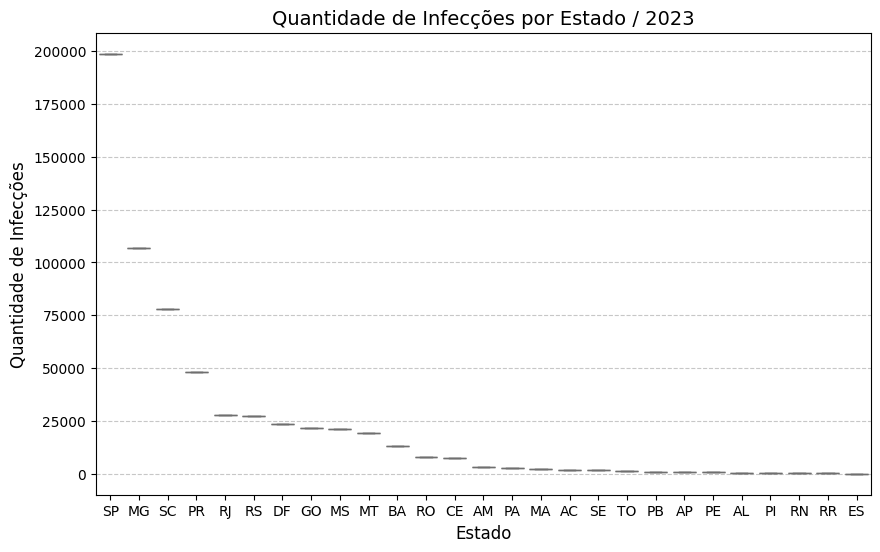

In [ ]:
# Criar boxplot 2023
plt.figure(figsize = (10,6))
sns.boxplot(data = infeccoes_estado_2023, x = 'uf', y = 'qtd_infeccoes', palette='pastel')

# Personalizar o gráfico
plt.title('Quantidade de Infecções por Estado / 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Mostrar o gráfico
plt.show()

### Outras visualizações

In [ ]:
 fig = px.box(infeccoes_estado_2023, y = 'qtd_infeccoes', title = 'Boxplot de INfecções por Estado / 2023')
 fig.show()

### Comparação com gráfico de barras

/tmp/ipython-input-71-3052492012.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




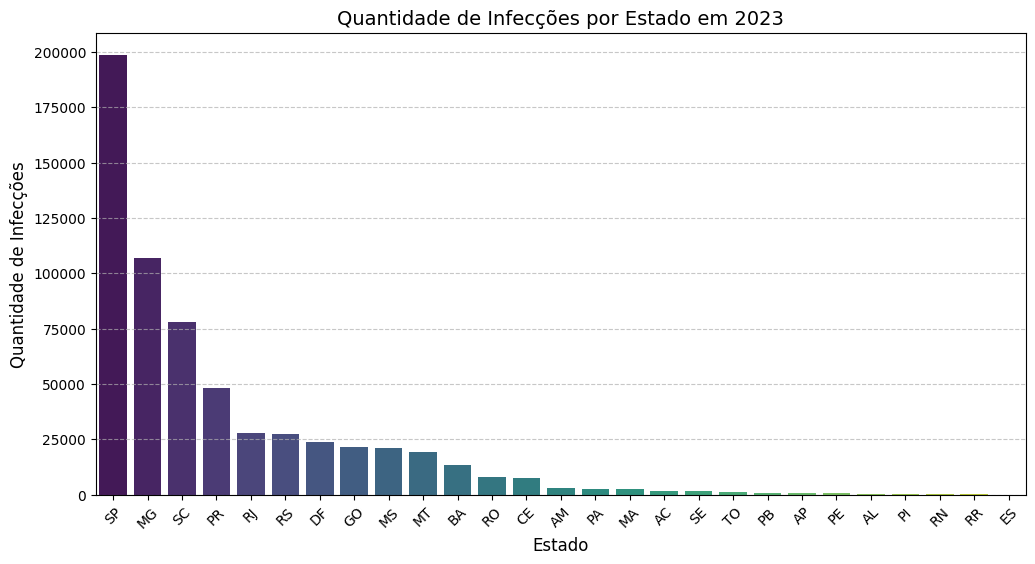

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(data = infeccoes_estado_2023, x = 'uf', y = 'qtd_infeccoes', palette='viridis')

# Personalizar o gráfico
plt.title('Quantidade de Infecções por Estado em 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.xticks(rotation = 45)

# Mostrar o Gráfico
plt.show()

### Gráfico de Tendências

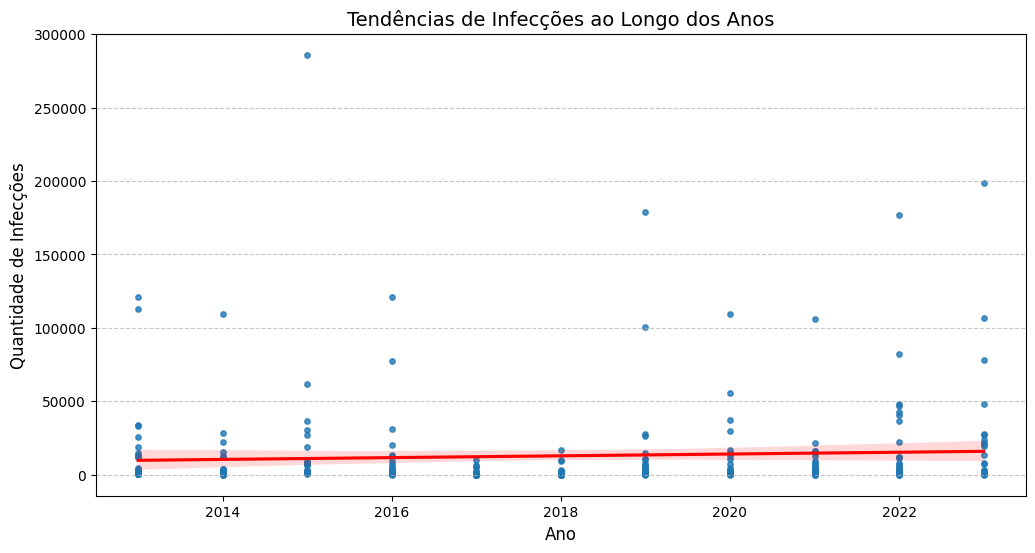

In [ ]:
# Criar o gráfico de tendência
plt.figure(figsize = (12, 6))
sns.regplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', scatter_kws={"s":15}, line_kws={"color":"red"})

# Personalizar o gráfico
plt.title('Tendências de Infecções ao Longo dos Anos', fontsize = 14)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)